Objective of the project is to create a multiple regression model that can be used to accurately predict the price of the house


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [141]:
df = pd.read_csv("kc_house_data[1].csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [142]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [143]:
df.shape

(21597, 21)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [145]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


looking for non-values

In [146]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

waterfront and yr_renovated have null-values

In [147]:
def missing_data(df,column):
    length_of_df=len(df) 
    missing_data = column.isna().sum()
    percentage_of_missing_data=round((missing_data/length_of_df*100),2)
    return print(f"percentage of missing data: {percentage_of_missing_data}""%")
missing_data(df,df["yr_renovated"])

percentage of missing data: 17.79%


dropping the non-values would cause some conflicts,adding mode can solve

In [148]:
df["yr_renovated"].fillna(df["yr_renovated"].mode()[0],inplace=True)
df["yr_renovated"].isna().sum()

0

In [149]:
import datetime

current_year = datetime.datetime.now().year  # Get current year

df['age_home'] = current_year - df['yr_built']

# Handle missing values in yr_renovated
df['yr_renovated'].fillna(0, inplace=True)  # Replace missing values with 0

df['yrsince_reno'] = current_year - df['yr_renovated']
df['yrsince_reno'] = df['yrsince_reno'].where(df['yr_renovated'] != 0, None)  # Replace 0 with None

df.drop(columns=['yr_built', 'yr_renovated'], inplace=True)


In [150]:
df['waterfront'] = df['waterfront'].astype(str)  # Convert to string
df['waterfront'].fillna('NO',inplace=True)
df['waterfront'].isna().sum()

0

In [151]:
df['waterfront'].value_counts()

waterfront
0.0    19075
nan     2376
1.0      146
Name: count, dtype: int64

In [152]:
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [153]:
df['view'].replace(to_replace=['NONE','AVERAGE','GOOD','FAIR','EXCELLENT'],value=[0,1,2,3,4], inplace=True)


In [154]:
df['view'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: view
Non-Null Count  Dtype  
--------------  -----  
21534 non-null  float64
dtypes: float64(1)
memory usage: 168.9 KB


In [155]:
df['condition'].replace(to_replace=['Poor','Fair','Average','Good','Very Good'],value=[1,2,3,4,5],inplace=True)

In [156]:
df['grade'].replace(to_replace=['7 Average','6 Low Average','8 Good','11 Excellent','9 Better','5 Fair','10 Very Good','12 Luxury','4 Low','3 Poor','13 Mansion'], value=[7,6,8,11,9,5,10,12,4,3,13], inplace=True)

In [157]:
df['view'].fillna(df['view'].median(),inplace=True)

In [158]:
df.isna().sum()

id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
age_home             0
yrsince_reno     20853
dtype: int64

In [159]:
df['yrsince_reno'].fillna(0,inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
age_home         0
yrsince_reno     0
dtype: int64

checking for duplicates

In [160]:
df.duplicated().sum()

0

In [161]:
df['date'].describe()

count         21597
unique          372
top       6/23/2014
freq            142
Name: date, dtype: object

In [162]:
date_df = pd.to_datetime(df['date'])
date_df

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [163]:
date_df.max(),date_df.min()

(Timestamp('2015-05-27 00:00:00'), Timestamp('2014-05-02 00:00:00'))

In [164]:
df['id'].value_counts()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

In [165]:
sold_more_than_once = len(df) - len(df['id'].value_counts())
sold_more_than_once

177

In [166]:
df[df['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_home,yrsince_reno
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,98168,47.5045,-122.33,1070,6250,74,0.0
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,98168,47.5045,-122.33,1070,6250,74,0.0
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,nan,0.0,...,5,1080,0.0,98168,47.5045,-122.33,1070,6250,74,0.0


In [167]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'],errors='coerce')
(df['sqft_basement'].dtype)

dtype('float64')

In [168]:
df['sqft_basement']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [169]:
median_value = df['sqft_basement'].median()
df['sqft_basement'].replace(np.nan,median_value,inplace=True)
df['sqft_basement'].value_counts()

sqft_basement
0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 303, dtype: int64

In [170]:
df['sqft_basement'].max()

4820.0

mostly are in 0.0

In [171]:
df.drop('sqft_basement',axis=1,inplace=True)

In [172]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

replacing the bedooms with 3 its mode

In [173]:
df['bedrooms'].replace(33,3, inplace=True)
df['bedrooms'].value_counts()

bedrooms
3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  age_ho

focusing on the relationship between the features and house prices

In [175]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'age_home', 'yrsince_reno'],
      dtype='object')

In [176]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [177]:
df['price_log'] = np.log(df['price'])
df['price_log'].describe()

count    21597.000000
mean        13.048211
std          0.526555
min         11.264464
25%         12.682307
50%         13.017003
75%         13.377006
max         15.856731
Name: price_log, dtype: float64

In [178]:
df_clean = df[['sqft_living','sqft_above','grade','bathrooms','bedrooms','price_log','price']]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  21597 non-null  int64  
 1   sqft_above   21597 non-null  int64  
 2   grade        21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   bedrooms     21597 non-null  int64  
 5   price_log    21597 non-null  float64
 6   price        21597 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 1.2 MB


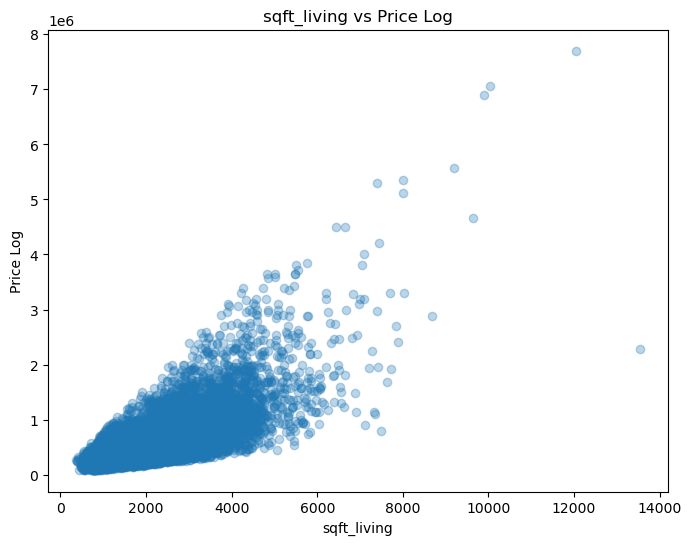

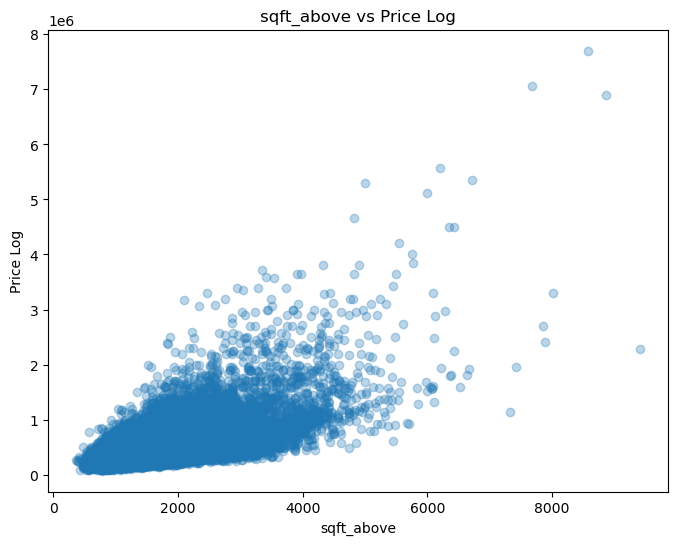

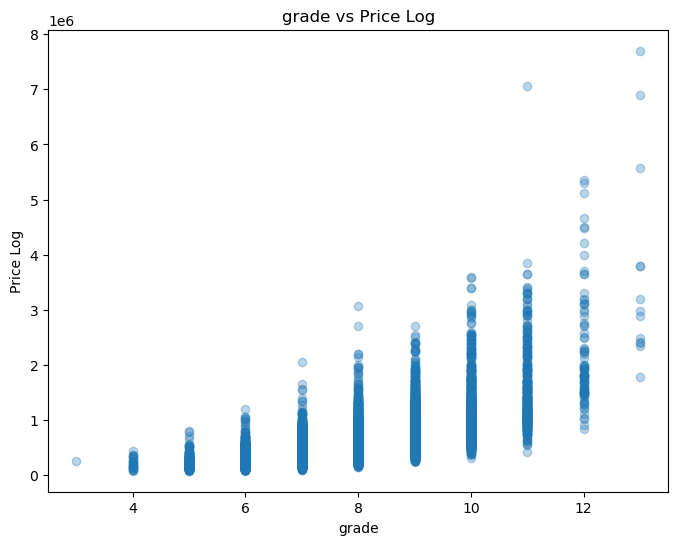

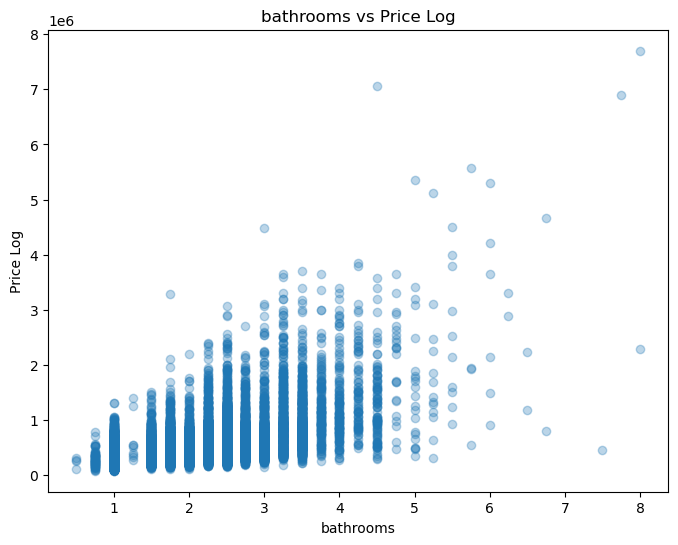

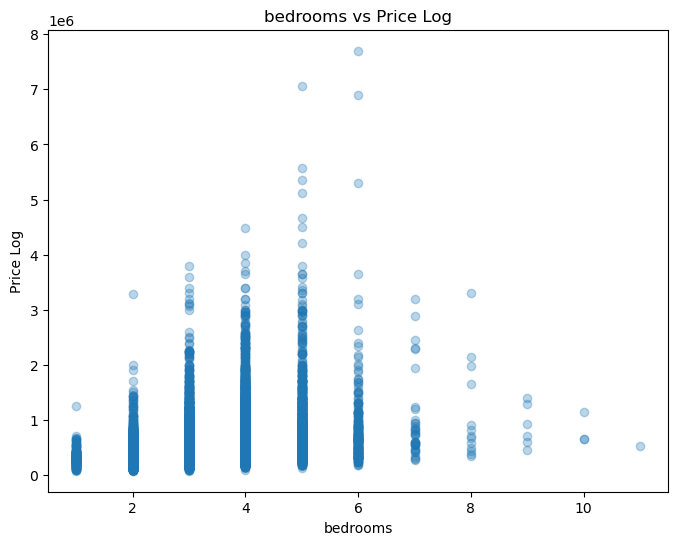

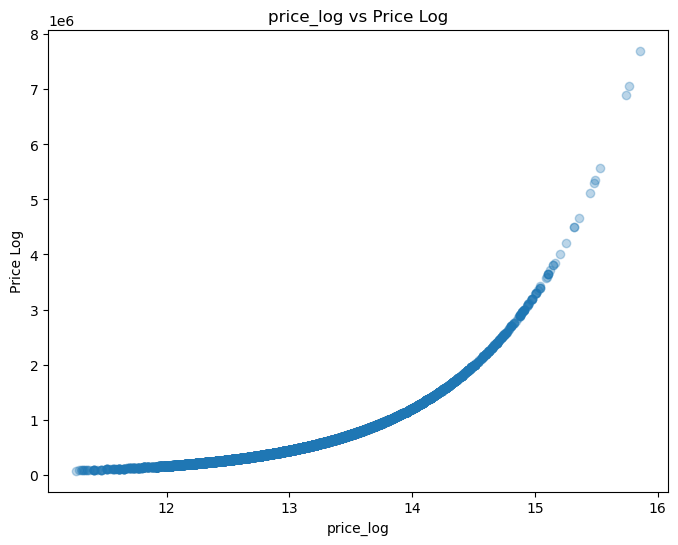

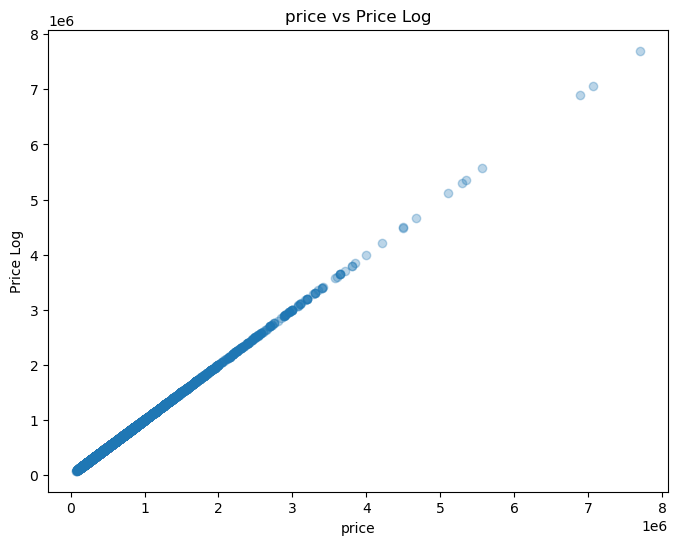

In [179]:
for feature in df_clean:
    plt.figure(figsize=(8,6))
    plt.scatter(df_clean[feature],df_clean['price'],alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('Price Log')
    plt.title(f'{feature} vs Price Log')
    plt.show()

data analysis of the plotted graphs

In [180]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age_home,yrsince_reno,price_log
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,53.000324,0.967032,13.048211
std,2.876736e+09,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,53.513072,0.138552,0.140724,685.230472,27274.441950,29.375234,5.880857,0.526555
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,9.000000,0.000000,11.264464
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,27.000000,0.000000,12.682307
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,49.000000,0.000000,13.017003
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,73.000000,0.000000,13.377006
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,124.000000,90.000000,15.856731


The median 50% is lower than the mean, suggesting potential positive skewness which is common in the housing price

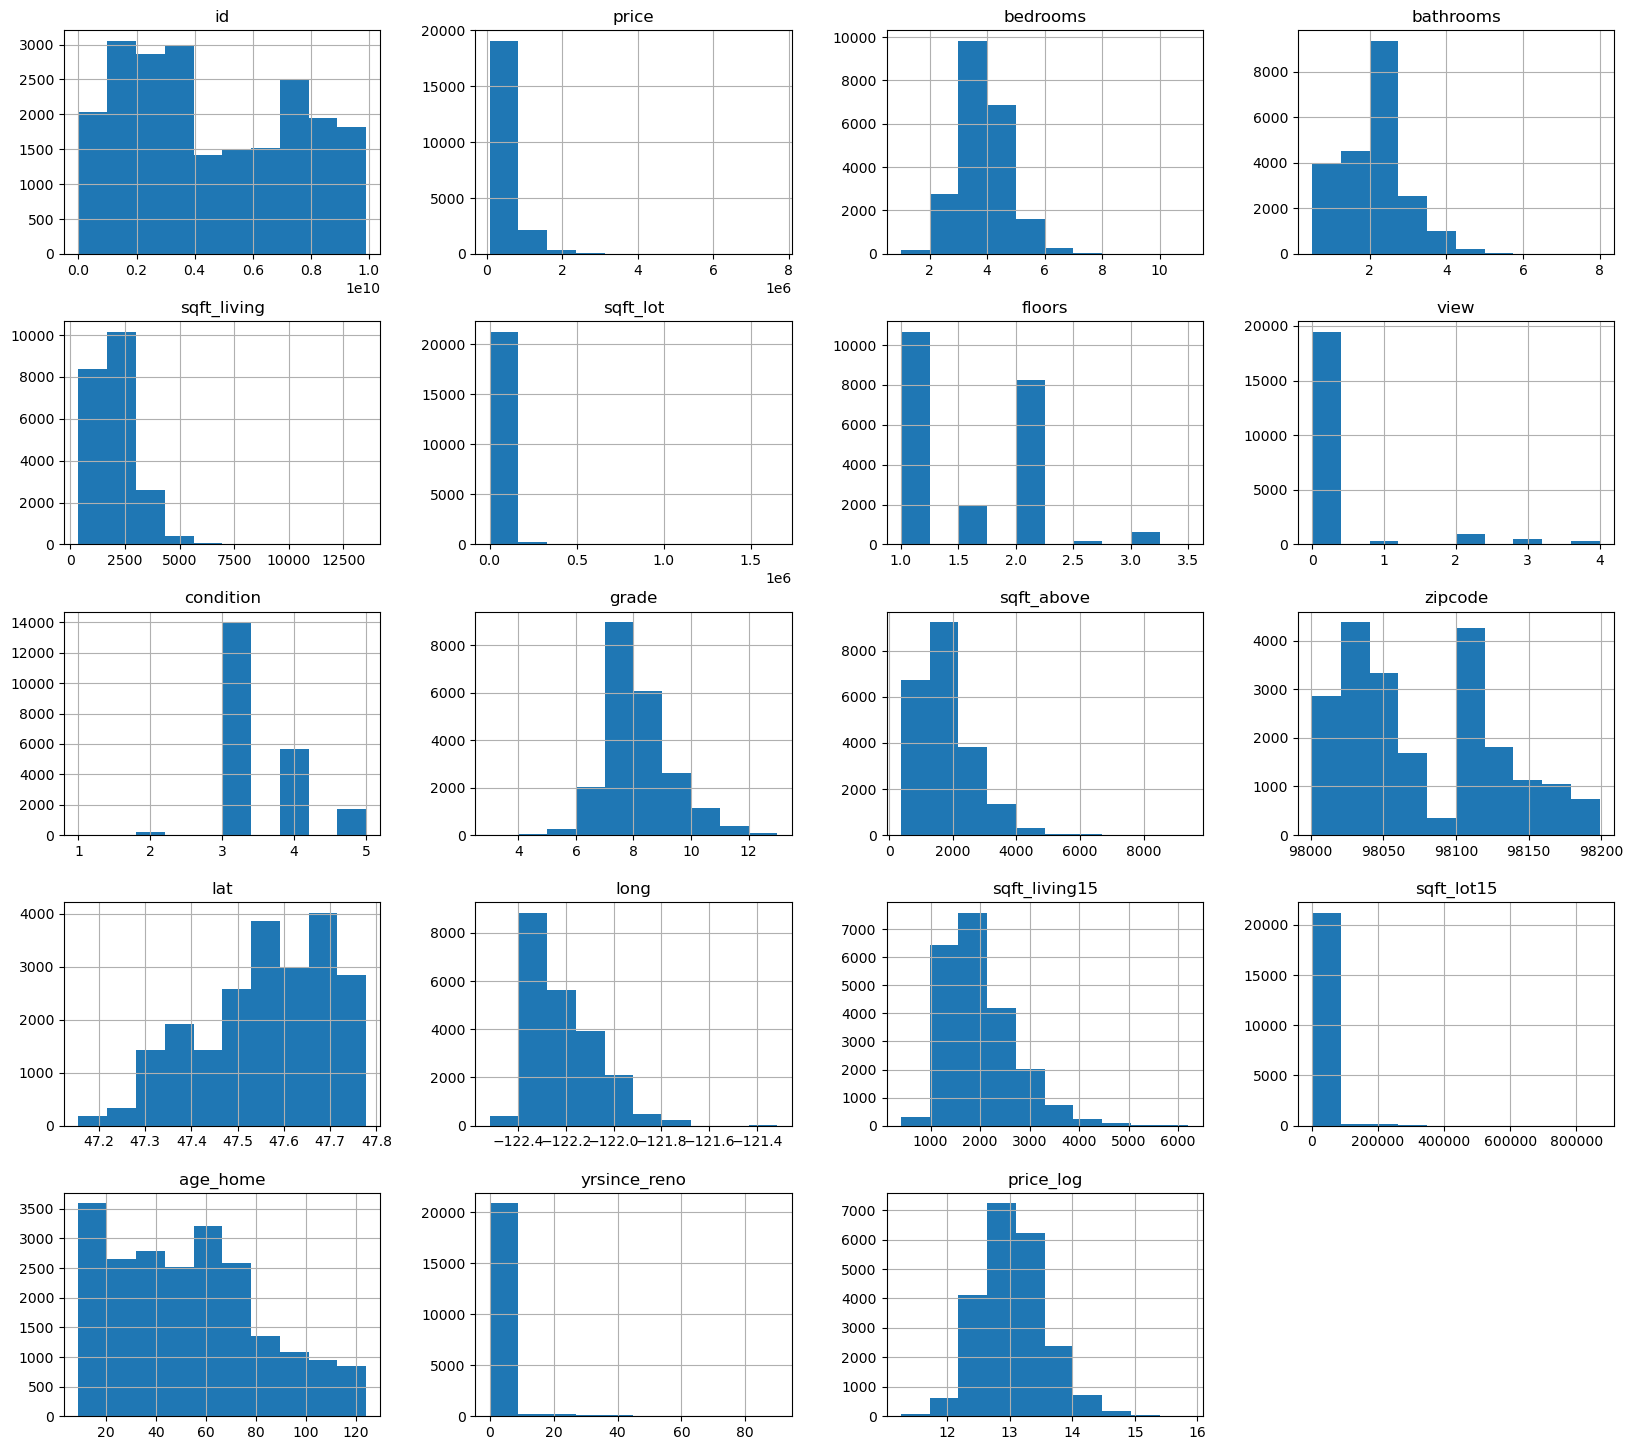

In [181]:
df.hist(figsize = (20,18));

In [182]:
categorical_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtype == '0':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
print(f"Categorical columns:", categorical_columns)
print(f"Numerical columns", numerical_columns)

Categorical columns: []
Numerical columns ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age_home', 'yrsince_reno', 'price_log']


many features exhibit + skewness,meaning there are a few extremely high values pulling the tail to the right.
some features such as price,sqft_living,_lot,might contain outliers which are data points that deviate significantly from the overall patterns
some features such as zipcode,might exhibit multimodality
the range values for each features varies significantly .some have a wide range others dont have


checking for outliers

In [195]:
df['date'] = pd.to_datetime(df['date'])
df['price_log'] = np.log1p(df['price'])


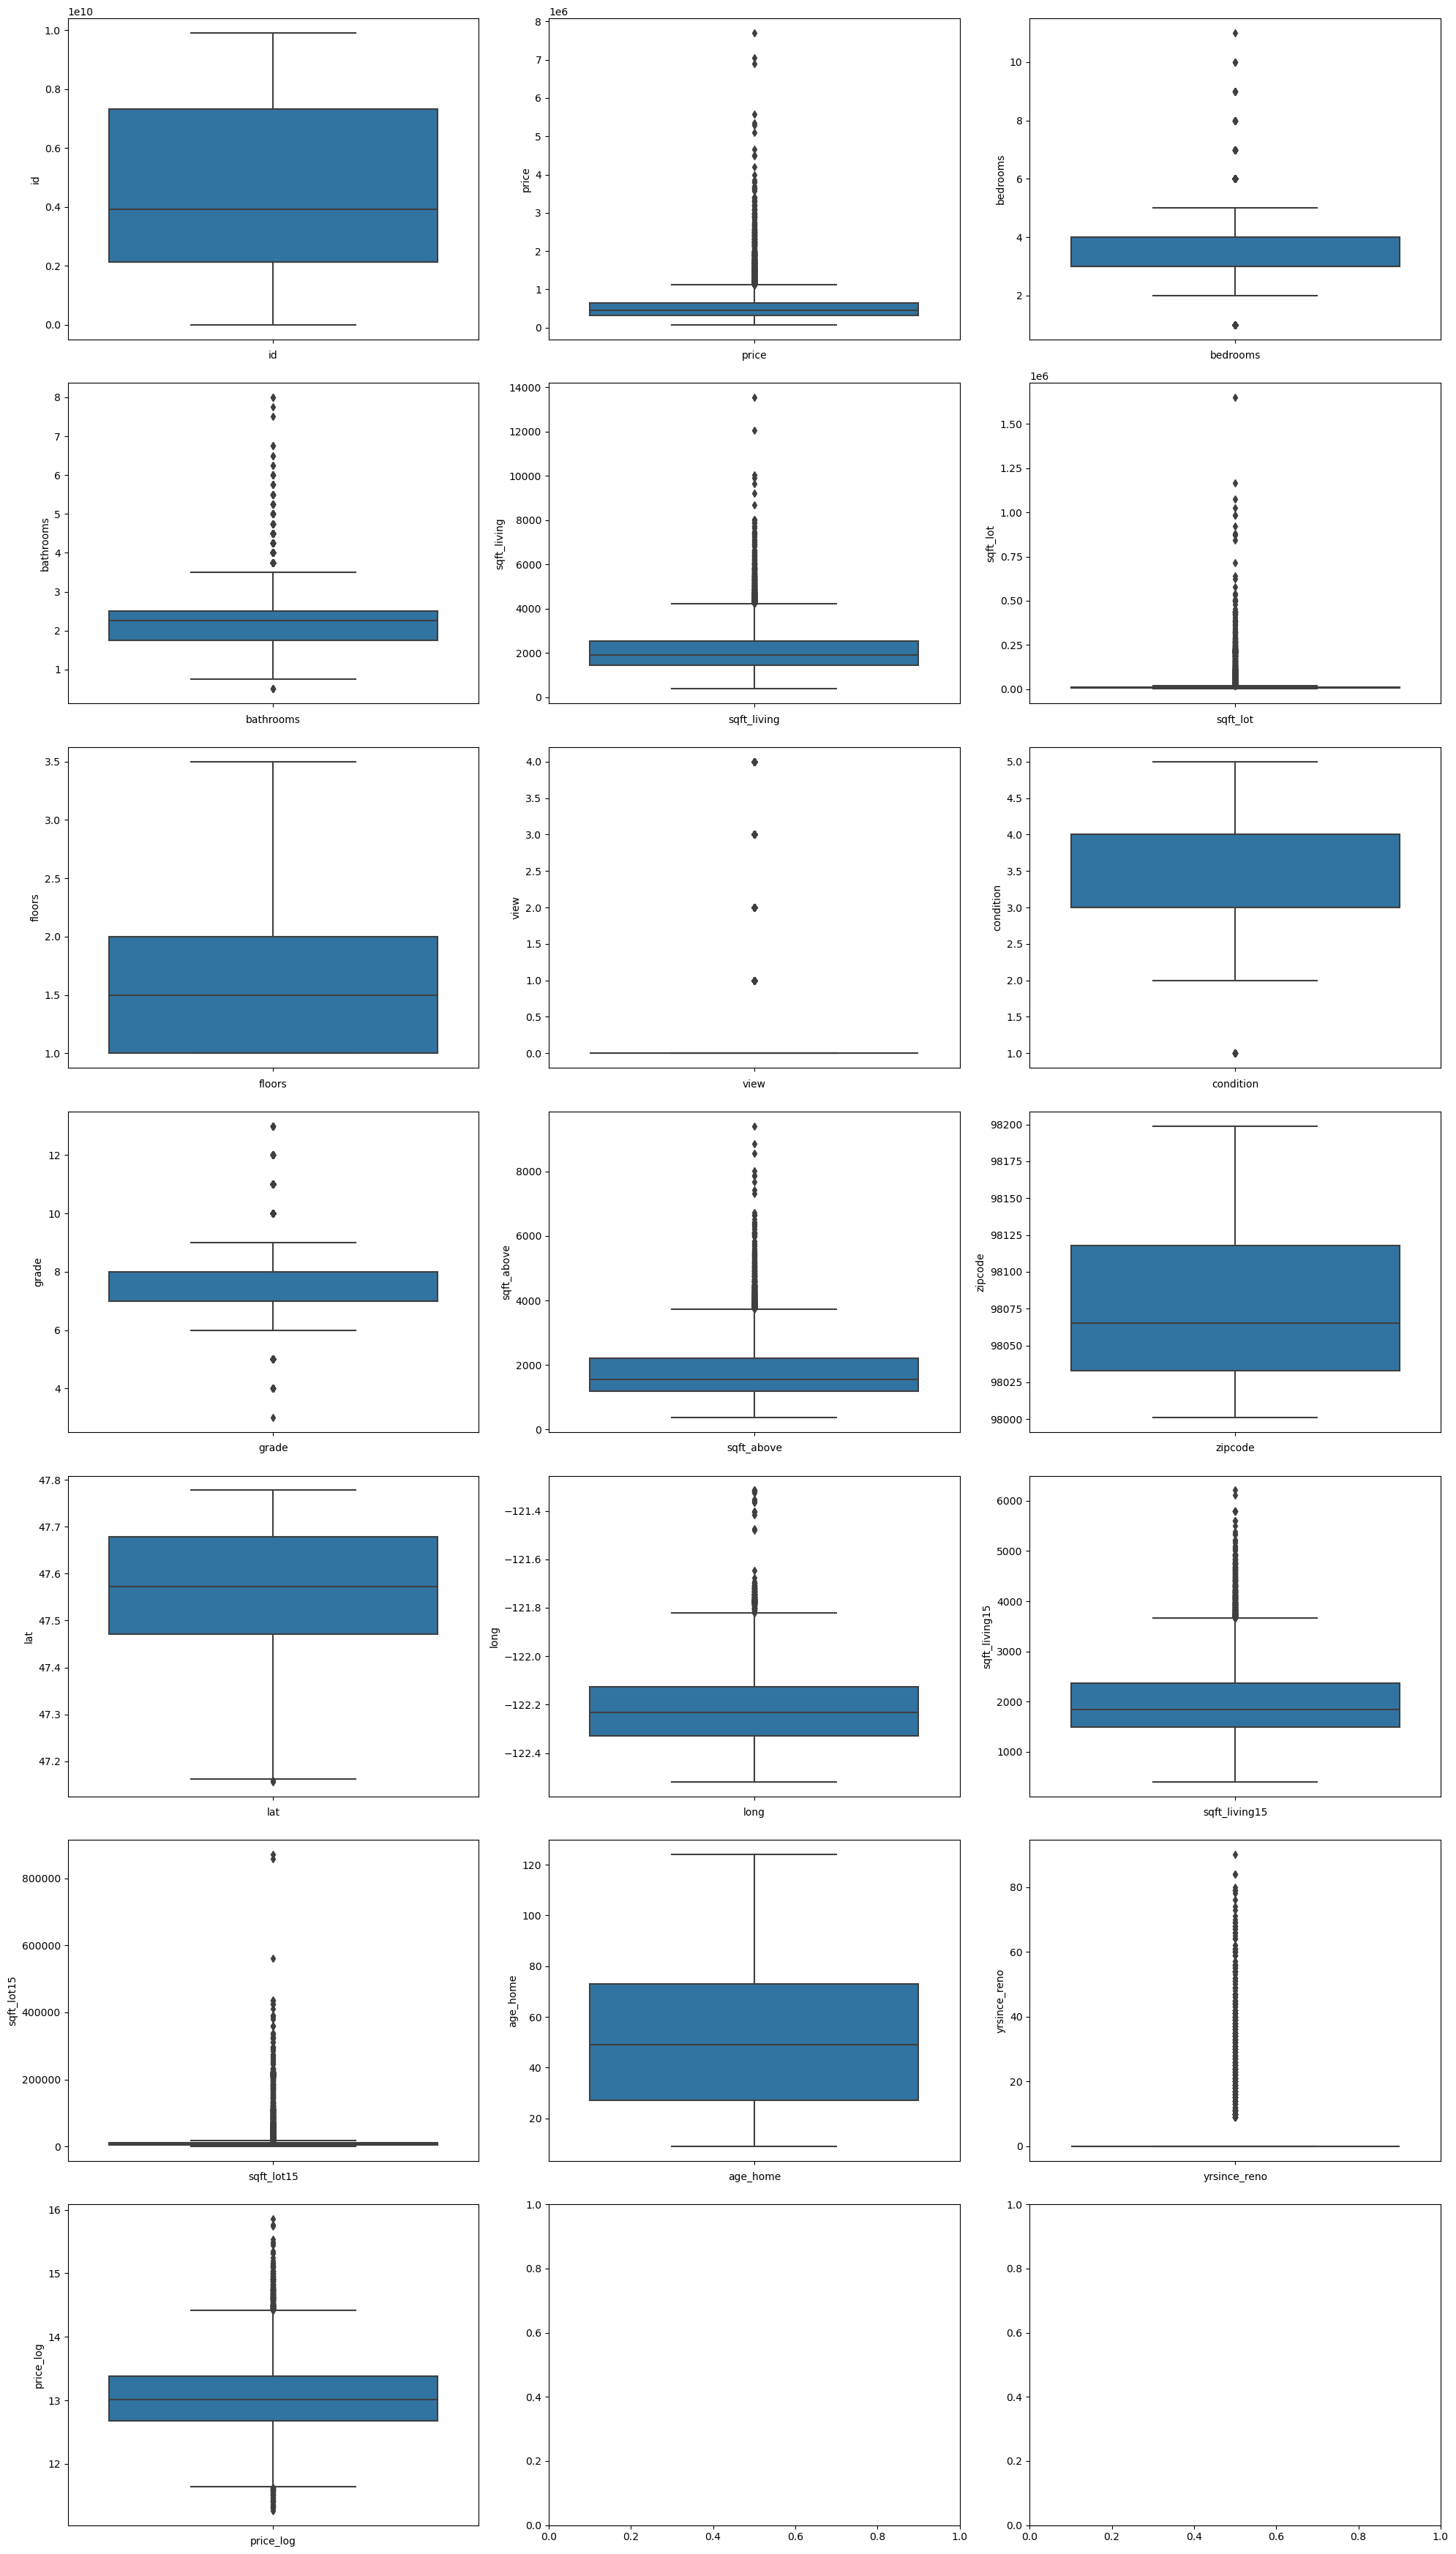

In [196]:
numerical_columns = [col for col in numerical_columns if df[col].dtype != object]

num_columns = len(numerical_columns)
num_rows = (num_columns - 1) // 3 + 1
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, num_rows * 5))

for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel(column)

plt.tight_layout()
plt.show()



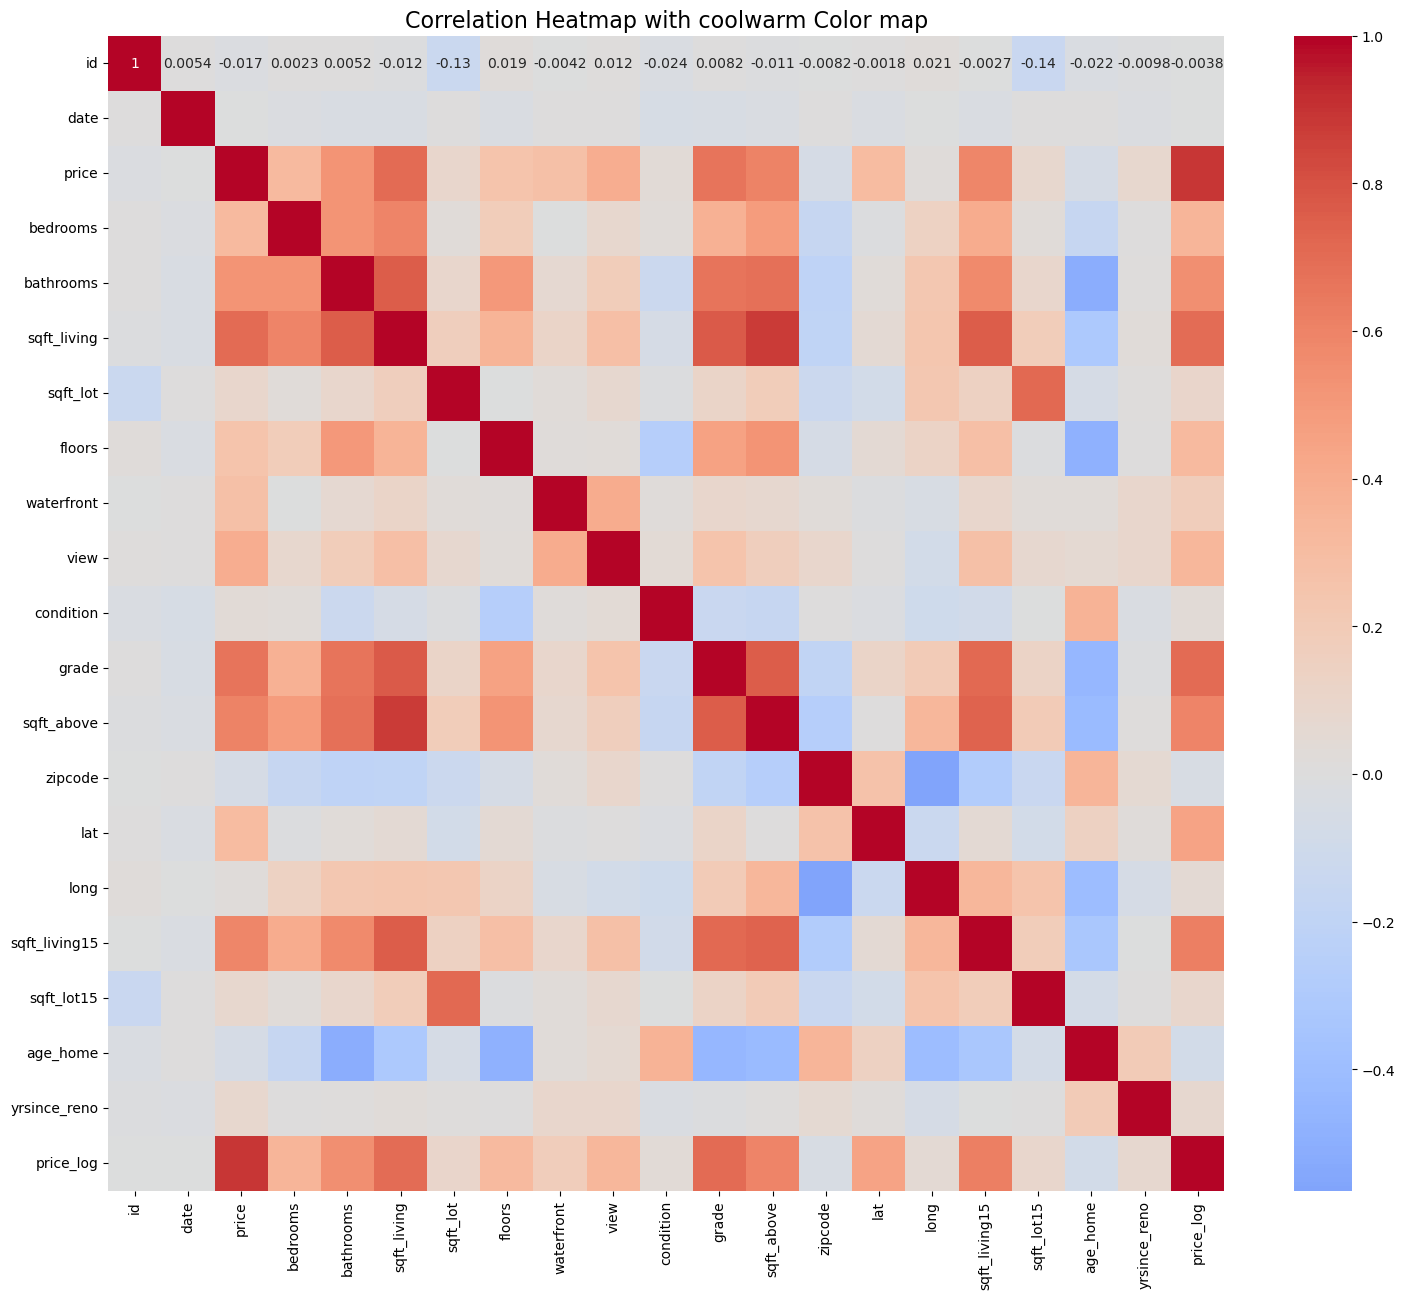

In [197]:
correlation = df.corr()  # Recalculate after handling string column
plt.figure(figsize=(18,15))
sns.heatmap(correlation , center=0,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap with coolwarm Color map',fontsize=16)
plt.show()
